In [1]:
from matplotlib import pyplot as plt
% matplotlib inline
plt.style.use('seaborn-dark-palette')

import numpy as np

Let's first create some sample data to get a rough idea of a function that may be nice to maximise.

In [133]:
xlim = (-100, 100)
x = np.linspace(*xlim, num=5000)

def true_func(s):
    return (
        np.sin(s / 4) +
        np.cos(s / 2) +
        3 * np.sin(s / 2) +
        np.cos(s / 25)
        - 0.0005 * (s - 4) ** 2
    )

y = np.array([true_func(x_) for x_ in x])

And let's plot this.

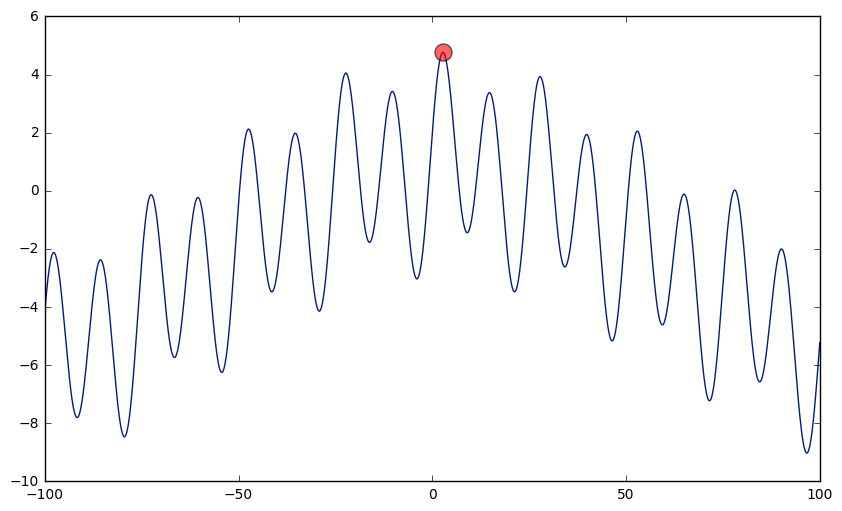

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, zorder=1)
plt.scatter(
    x[np.argmax(y)], np.max(y),
    marker='o', c='r', alpha=0.6,
    s=150, zorder=2
)
plt.xlim(xlim);

This looks good, so we'll stick with that.

In [132]:
k_max = 750
temps = 100 / np.logspace(0., 4, num=k_max)

def temperature(k, k_max, init=10., decay=0.99, use_decay=True):
    if use_decay:
        return init * decay ** k
    else:
        # Log scale
        return temps[k]

def neighbour(s):
    side = np.random.choice([-1, 1])
    step_size = np.random.normal(10, 5)
    return s + step_size * side

def P(e, e_prime, T):
    if e_prime < e:
        return 1.
    P_val = np.exp(-(e_prime - e) / T)
    return P_val

def E(s):
    return -true_func(s)

s = -100
s_hist = np.zeros(k_max)
for k in range(0, k_max):
    T = temperature(k, k_max)
    s_new = neighbour(s)
    P_update = P(E(s), E(s_new), T)
    if P_update >= np.random.uniform():
        s = s_new
    s_hist[k] = s

In [128]:
print('Found {:.4f}, true {:.4f}'.format(s, x[np.argmax(y)]))

Found 2.7526, true 2.7405


In [131]:
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='html5')

fig = plt.figure()
plt.plot(x, [true_func(x_) for x_ in x], zorder=1)
scat = plt.scatter(
    [], [],
    marker='o', c='r', alpha=0.6,
    s=150, zorder=2
)

def animate(i, s_hist, true_func, scat):
    s = s_hist[i]
    scat.set_offsets(np.array([s, true_func(s)]))
    return scat,

anim = animation.FuncAnimation(
    fig, animate, frames=len(s_hist), interval=42, blit=True,
    fargs=(s_hist, true_func, scat)
)

plt.close()
anim